# **Stroke Prediction**

**Dataset**: [`https://www.kaggle.com/fedesoriano/stroke-prediction-dataset`](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)<br>
**GitHub Repo**: [`https://github.com/stefanosPanteli/EPL448_Team1_StrokePrediction`](https://github.com/stefanosPanteli/EPL448_Team1_StrokePrediction)

## Team Members:

- **Loukia Shikki**: UC1066315
- **Stefanos Panteli**: UC1065916
- **Rafael Mitilineos**: UC1066383

---

# Installs

In [ ]:
#!pip install ipykernel pandas jinja2 matplotlib seaborn

---

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

---

# Global Functions & Constants

In [3]:
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
CYAN = '\033[96m'
RESET = '\033[0m'

def nicely_print(title: str, content: str = '') -> None:
    '''
    `nicely_print` prints a nicely formatted title and content.
    Meant to be used in the begining of a cell, or before showing a graph.

    `Args:`
        - title (str): The title of the cell. Will be formatted in bold, underlined and in cyan.
        - content (str): The content of the print message. Will only be formatted bold.
    '''
    print(f'{BOLD}{UNDERLINE}{CYAN}{title}{RESET} {BOLD}{content}{RESET}\n')

---

# Dataset Extraction & First Look & Exploratory Data Analysis

In [4]:
# Read CSV File
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
nicely_print('Dataset:', 'healthcare-dataset-stroke-data.csv')
df

Dataset: healthcare-dataset-stroke-data.csv



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
nicely_print('Shape & Columns')
print(f'Shape: {df.shape}')
columns = '\n'.join([f'  {i:>2}. {col}' for i, col in enumerate(df.columns, start= 1)])
print(f'Columns:\n{columns}')

Shape & Columns 

Shape: (5110, 12)
Columns:
   1. id
   2. gender
   3. age
   4. hypertension
   5. heart_disease
   6. ever_married
   7. work_type
   8. Residence_type
   9. avg_glucose_level
  10. bmi
  11. smoking_status
  12. stroke


In [6]:
nicely_print('Dataset Info', 'Non Null entries per column & Datatypes')
df.info()

Dataset Info Non Null entries per column & Datatypes

<class 'pandas.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   str    
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   str    
 6   work_type          5110 non-null   str    
 7   Residence_type     5110 non-null   str    
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   str    
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), str(5)
memory usage: 479.2 KB


In [7]:
nicely_print('Missing Values per Column')
df.isna().sum().sort_values(ascending= False).loc[ lambda x: x > 0 ]

Missing Values per Column 



bmi    201
dtype: int64

> <br>&emsp;**`Comments:`** It can be clearly seen that bmi has some missing values (201 out of 5110, or 3.9%)<br>&emsp;

In [8]:
nicely_print('Dataset Summary of Numerical Columns', 'Count, Mean, Std, Min, 25%, 50%, 75%, Max')
df.describe(include= 'number').T

Dataset Summary of Numerical Columns Count, Mean, Std, Min, 25%, 50%, 75%, Max



,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


> <br>&emsp;**`Comments:`** We can see that:<br>&emsp;&emsp;1. `bmi` has some *missing values*.<br>&emsp;&emsp;2. `age` has some *outliers* (0.08 min age)<br>&emsp;&emsp;3. There are some 0,1 *categorical data* such as `hypertension`, `heart_disease`, and the target variable `stroke`<br>&emsp;

Histogram & Boxplot Age, Glucose & BMI



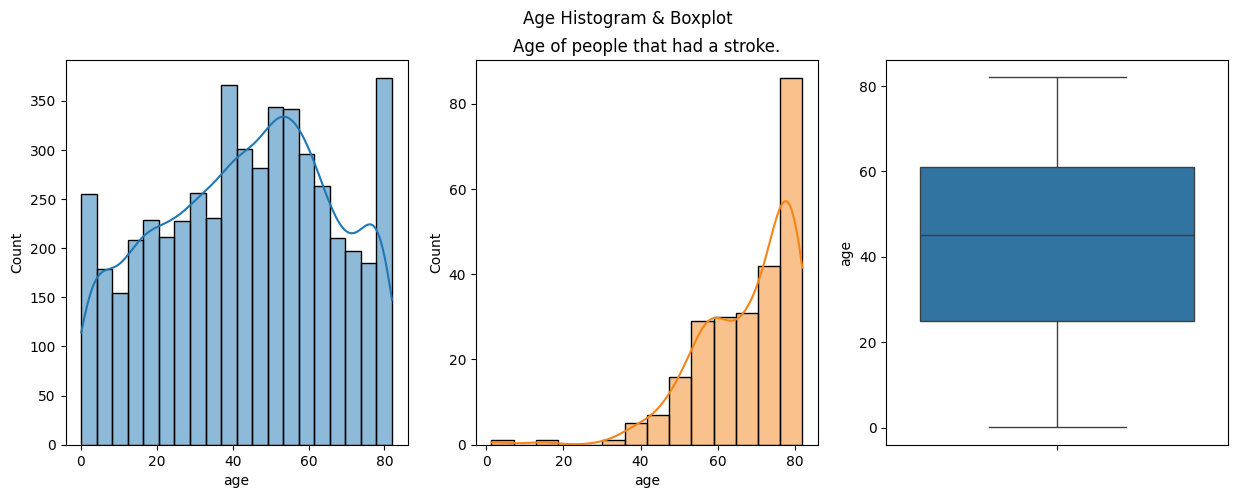

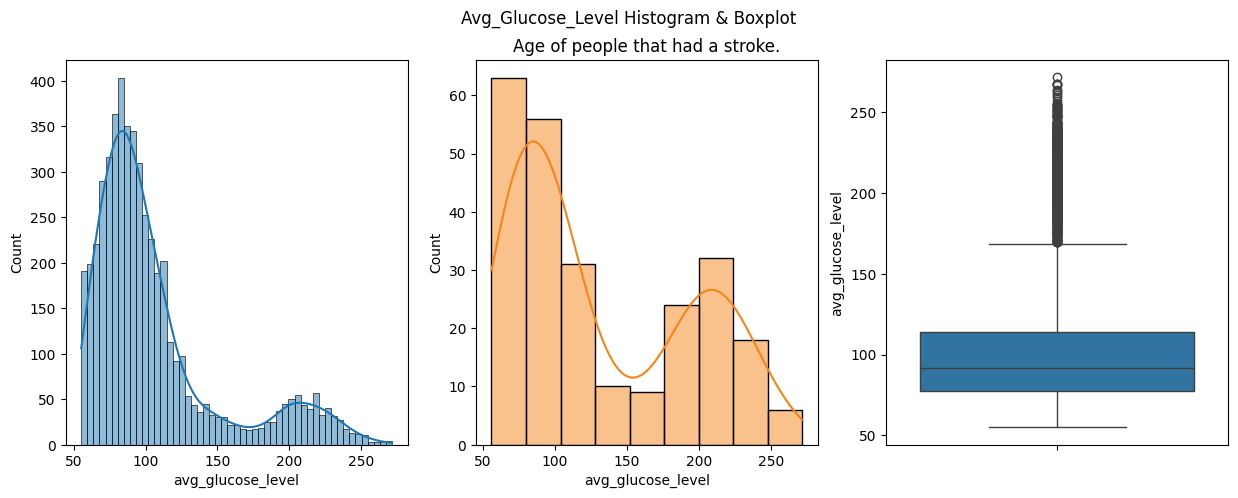

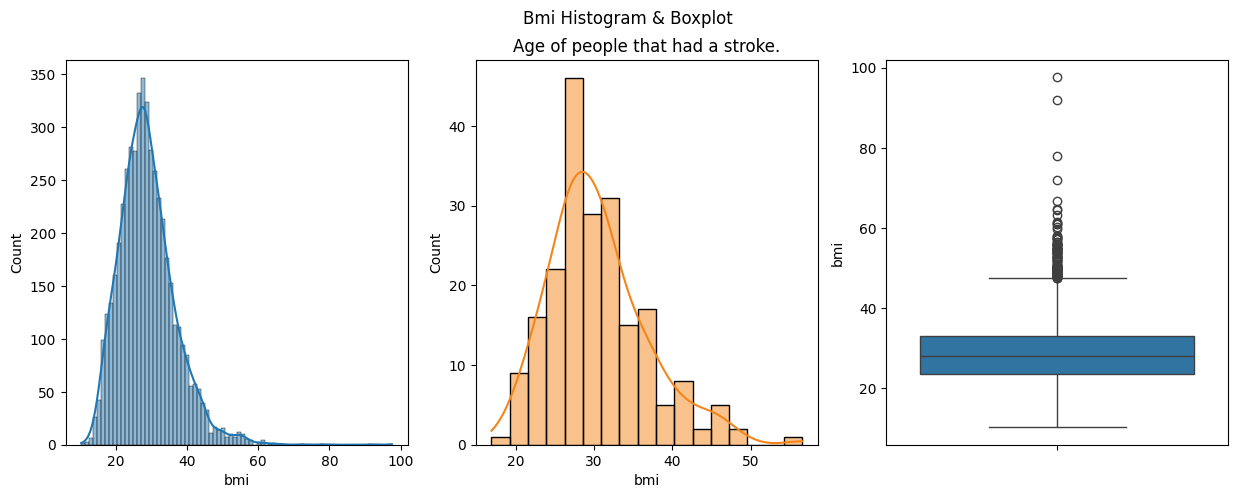

In [45]:
def plot_hist_and_boxplot(df: pd.DataFrame, stroke_df: pd.DataFrame, col: str) -> None:
    plt.figure(figsize= (15, 5))
    plt.suptitle(f'{col.title()} Histogram & Boxplot')
    plt.subplot(131)
    sns.histplot(data= df, x= col, kde= True)
    plt.subplot(132)
    sns.histplot(data= stroke_df, x= col, kde= True, color= '#F58518')
    plt.title('Age of people that had a stroke.')
    plt.subplot(133)
    sns.boxplot(data= df, y= col)
    plt.show()

nicely_print('Histogram & Boxplot', 'Age, Glucose & BMI')

for col in ['age', 'avg_glucose_level', 'bmi']:
    plot_hist_and_boxplot(df[[col]], df[ df['stroke'] == 1][[col]], col)

> <br>&emsp;**`Comments:`** We can see that:<br>&emsp;&emsp;1. `Average Glucose Levels` and `BMI` are right skewed, and they have **multiple outliers**.<br>&emsp;&emsp;2. The `age` of people who had a stroke is left skewed, more **older people** - expected.<br>&emsp;&emsp;3. The `BMI` of people who had a stroke is really similar with the `BMI` distribution of the whole dataset, **without the outliers**.<br>&emsp;

In [9]:
nicely_print('Dataset Summary of Categorical Columns', 'Count, Unique, Top, Freq')
df.describe(exclude= 'number').T

Dataset Summary of Categorical Columns Count, Unique, Top, Freq



,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


Categorical Data Categories Summary Gender, Hypertension, Heart_disease, Ever_married, Work_type, Residence_type, Smoking_status



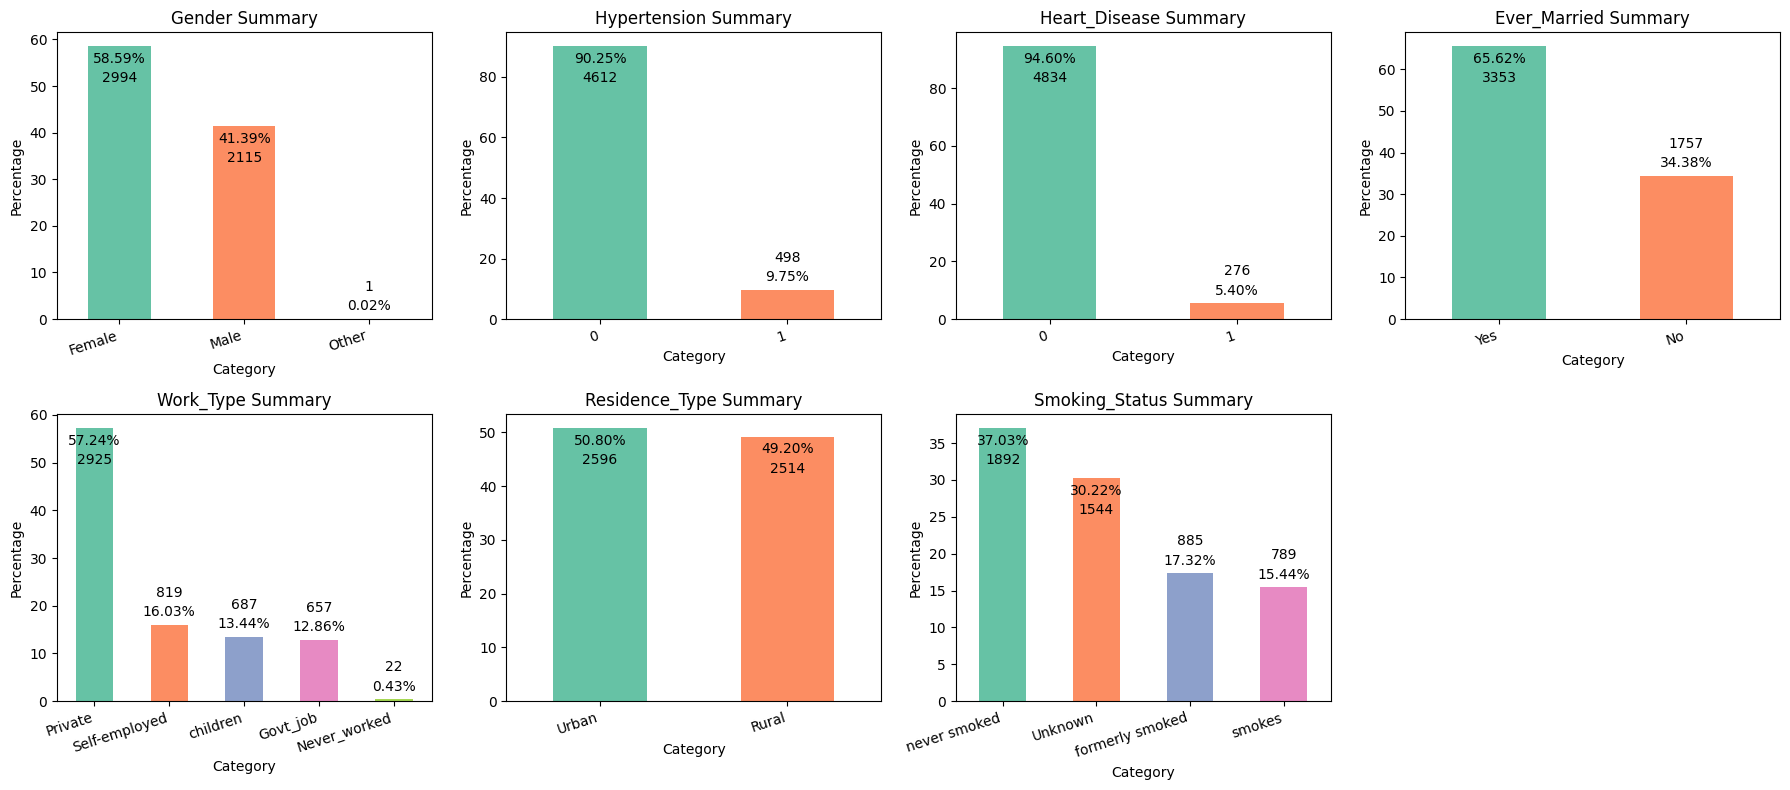

In [47]:
def plot_category_summary(summary: pd.DataFrame, col: str, ax) -> None:
    colours = plt.cm.Set2(range(len(summary)))

    summary.plot(kind='bar', x='category', y='percent', ax=ax, legend=False, color=colours)

    ax.set_title(f'{col.title()} Summary')
    ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')

    # nicer category labels
    ax.tick_params(axis='x', labelrotation= 18)
    for lbl in ax.get_xticklabels():
        lbl.set_horizontalalignment('right')

    # Add the percentage on top of the bars and the count underneath the bars
    ymin, ymax = ax.get_ylim()
    y_mid = (ymin + ymax) / 2
    for p, count_val in zip(ax.patches, summary['count'].values):
        h = p.get_height()
        x = p.get_x() + p.get_width() / 2.

        if h > y_mid: x_coef = -1; va = 'top'
        else:         x_coef = 1;  va = 'bottom'
        ax.annotate(
            f'{p.get_height():.2f}%', (x, h), ha='center', va=va,
            xytext=(0, 4*x_coef), textcoords='offset points'
        )
        ax.annotate(
            f'{count_val:.0f}', (x, h), ha='center', va=va,
            xytext=(0, 18*x_coef), textcoords='offset points'
        )


nicely_print('Categorical Data Categories Summary', 'Gender, Hypertension, Heart_disease, Ever_married, Work_type, Residence_type, Smoking_status')

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
spacer = pd.DataFrame([{'column': '', 'category': '', 'count': '', 'percent': ''}])
summary_parts = []

for col in categorical_columns:
    column = df[col]

    summary = (
        column.value_counts(dropna= False)
        .rename_axis('category')
        .to_frame('count')
        .assign(percent=lambda x: (x['count'] / x['count'].sum() * 100).round(2))
        .sort_values('count', ascending= False)
        .reset_index()
    )

    summary.insert(0, 'column', col)
    summary_parts.append(summary)
    summary_parts.extend([spacer, spacer, spacer, spacer])

summary_df = pd.concat(summary_parts, ignore_index= True)

if summary_df.iloc[-1].eq('').all():
    summary_df = summary_df.iloc[:-1].copy()

_, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    plot_category_summary(summary_df[summary_df['column'] == col], col, axes[i])

# hide the unused 8th subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# summary_df.style.hide(axis='index')

> <br>&emsp;**`Comments:`** We can see that:<br>&emsp;&emsp;1. There are more `females` than `males` by 20%.<br>&emsp;&emsp;2. Most people did not experience `hypertension` or `heart_disease`.<br>&emsp;&emsp;3. A little over half of the people are `married`.<br>&emsp;&emsp;4. Half of the people are *working* `private` jobs, while only 0.4% of people `never worked`.<br>&emsp;&emsp;5. *Recidence type* is balanced between `urban` and `rural`.<br>&emsp;&emsp;6. A stable decrease in the *smoking status* can be observed from the category `never smoked`, to `unknown`, to `formerly smoked` and lastly `smokes`.<br>&emsp;

Categorical Data Categories Summary on Rows With Stroke Gender, Hypertension, Heart_disease, Ever_married, Work_type, Residence_type, Smoking_status



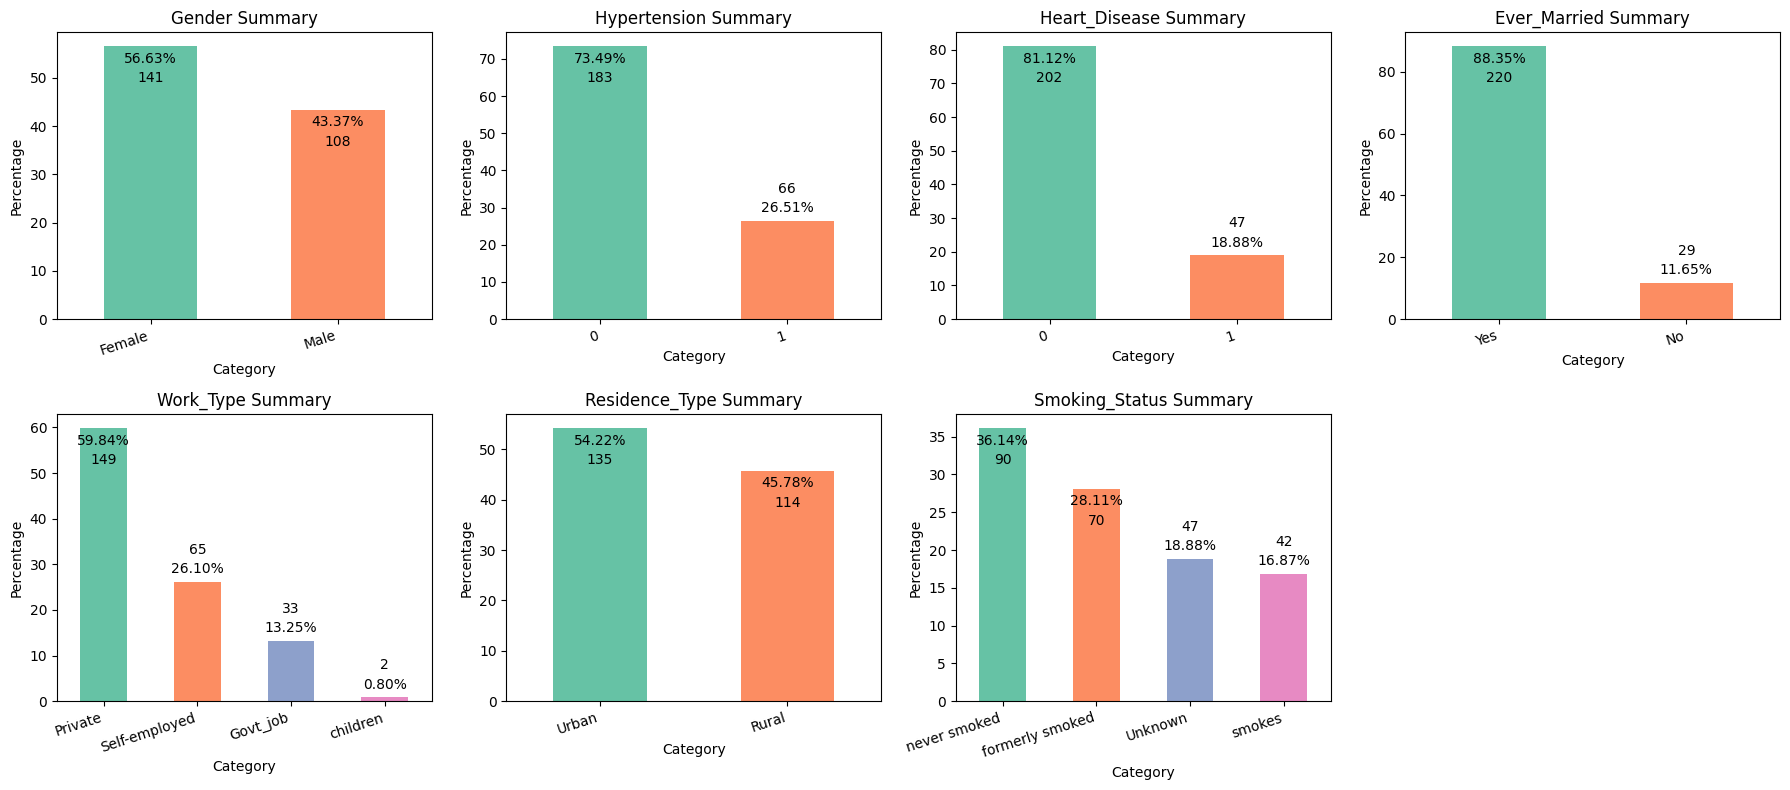

In [48]:
def plot_category_summary(summary: pd.DataFrame, col: str, ax) -> None:
    colours = plt.cm.Set2(range(len(summary)))

    summary.plot(kind='bar', x='category', y='percent', ax=ax, legend=False, color=colours)

    ax.set_title(f'{col.title()} Summary')
    ax.set_xlabel('Category')
    ax.set_ylabel('Percentage')

    # nicer category labels
    ax.tick_params(axis='x', labelrotation= 18)
    for lbl in ax.get_xticklabels():
        lbl.set_horizontalalignment('right')

    # Add the percentage on top of the bars and the count underneath the bars
    ymin, ymax = ax.get_ylim()
    y_mid = (ymin + ymax) / 2
    for p, count_val in zip(ax.patches, summary['count'].values):
        h = p.get_height()
        x = p.get_x() + p.get_width() / 2.

        if h > y_mid: x_coef = -1; va = 'top'
        else:         x_coef = 1;  va = 'bottom'
        ax.annotate(
            f'{p.get_height():.2f}%', (x, h), ha='center', va=va,
            xytext=(0, 4*x_coef), textcoords='offset points'
        )
        ax.annotate(
            f'{count_val:.0f}', (x, h), ha='center', va=va,
            xytext=(0, 18*x_coef), textcoords='offset points'
        )


nicely_print('Categorical Data Categories Summary on Rows With Stroke', 'Gender, Hypertension, Heart_disease, Ever_married, Work_type, Residence_type, Smoking_status')

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
spacer = pd.DataFrame([{'column': '', 'category': '', 'count': '', 'percent': ''}])
summary_parts = []

for col in categorical_columns:
    column = df[ df['stroke'] == 1 ][col]

    summary = (
        column.value_counts(dropna= False)
        .rename_axis('category')
        .to_frame('count')
        .assign(percent=lambda x: (x['count'] / x['count'].sum() * 100).round(2))
        .sort_values('count', ascending= False)
        .reset_index()
    )

    summary.insert(0, 'column', col)
    summary_parts.append(summary)
    summary_parts.extend([spacer, spacer, spacer, spacer])

summary_df = pd.concat(summary_parts, ignore_index= True)

if summary_df.iloc[-1].eq('').all():
    summary_df = summary_df.iloc[:-1].copy()

_, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    plot_category_summary(summary_df[summary_df['column'] == col], col, axes[i])

# hide the unused 8th subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# summary_df.style.hide(axis='index')

> <br>&emsp;**`Comments:`** We can see that:<br>&emsp;&emsp;1. The `gender` does not have a significant role on the stroke.<br>&emsp;&emsp;2. `Hypertension` seems to have little impact, however the percentage more than *doubled* from the initial distribution.<br>&emsp;&emsp;3. `Heart Desease` is the same case, however the percentage has more than tripled.<br>&emsp;&emsp;4. `Married` people seem to have a greater possibility of having a stroke.<br>&emsp;&emsp;5. `Children` seem to have the least risk of having a stroke, and no person that `never worked` experienced a stroke, probably because they were the great **minority**.<br>&emsp;&emsp;6. A slight increase on the percentage of `Urban` recidents<br>&emsp;&emsp;7. `Former Smokers'` percentage rose drastically.<br>&emsp;

Stroke Rate Amount of people that experienced a stroke, and its percentage.



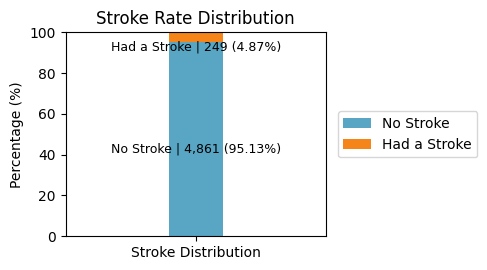

In [ ]:
nicely_print('Stroke Rate', 'Amount of people that experienced a stroke, and its percentage.')

target = df['stroke']

summary = (
    target.value_counts(dropna= False)
    .rename_axis('stroke')
    .to_frame('count')
    .assign(percent=lambda x: (x['count'] / x['count'].sum() * 100).round(2))
    .sort_index()
)

summary = summary.reindex([0, 1], fill_value= 0)

# Plot
labels = ['No Stroke', 'Had a Stroke']
counts = summary['count'].values
percents = summary['percent'].values

# Single stacked bar
fig, ax = plt.subplots(figsize=(5, 2.8))

colors = ["#58A5C4", '#F58518']

bottom = 0
bar_width = 0.25

for i in range(2):
    ax.bar(
        x= [0],
        height= [percents[i]],
        bottom= bottom,
        width= bar_width,
        color= colors[i],
        label= labels[i]
    )

    if percents[i] > 0:
        y_center = bottom + percents[i] / 2 - 5
        ax.annotate(
            f"{labels[i]} | {counts[i]:,} ({percents[i]:.2f}%)",
            xy= (0, y_center), ha= 'center', va= 'center',
            fontsize= 9, color= 'black'
        )

    bottom += percents[i]

ax.set_title('Stroke Rate Distribution')
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)
ax.set_xlim(-0.6, 0.6)
ax.set_xticks([0])
ax.set_xticklabels(['Stroke Distribution'])
ax.legend(loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

> <br>&emsp;**`Comments:`** We can see that the dataset is imbalanced, with a stroke rate of 4.1%.<br>&emsp;

Pair Plot 



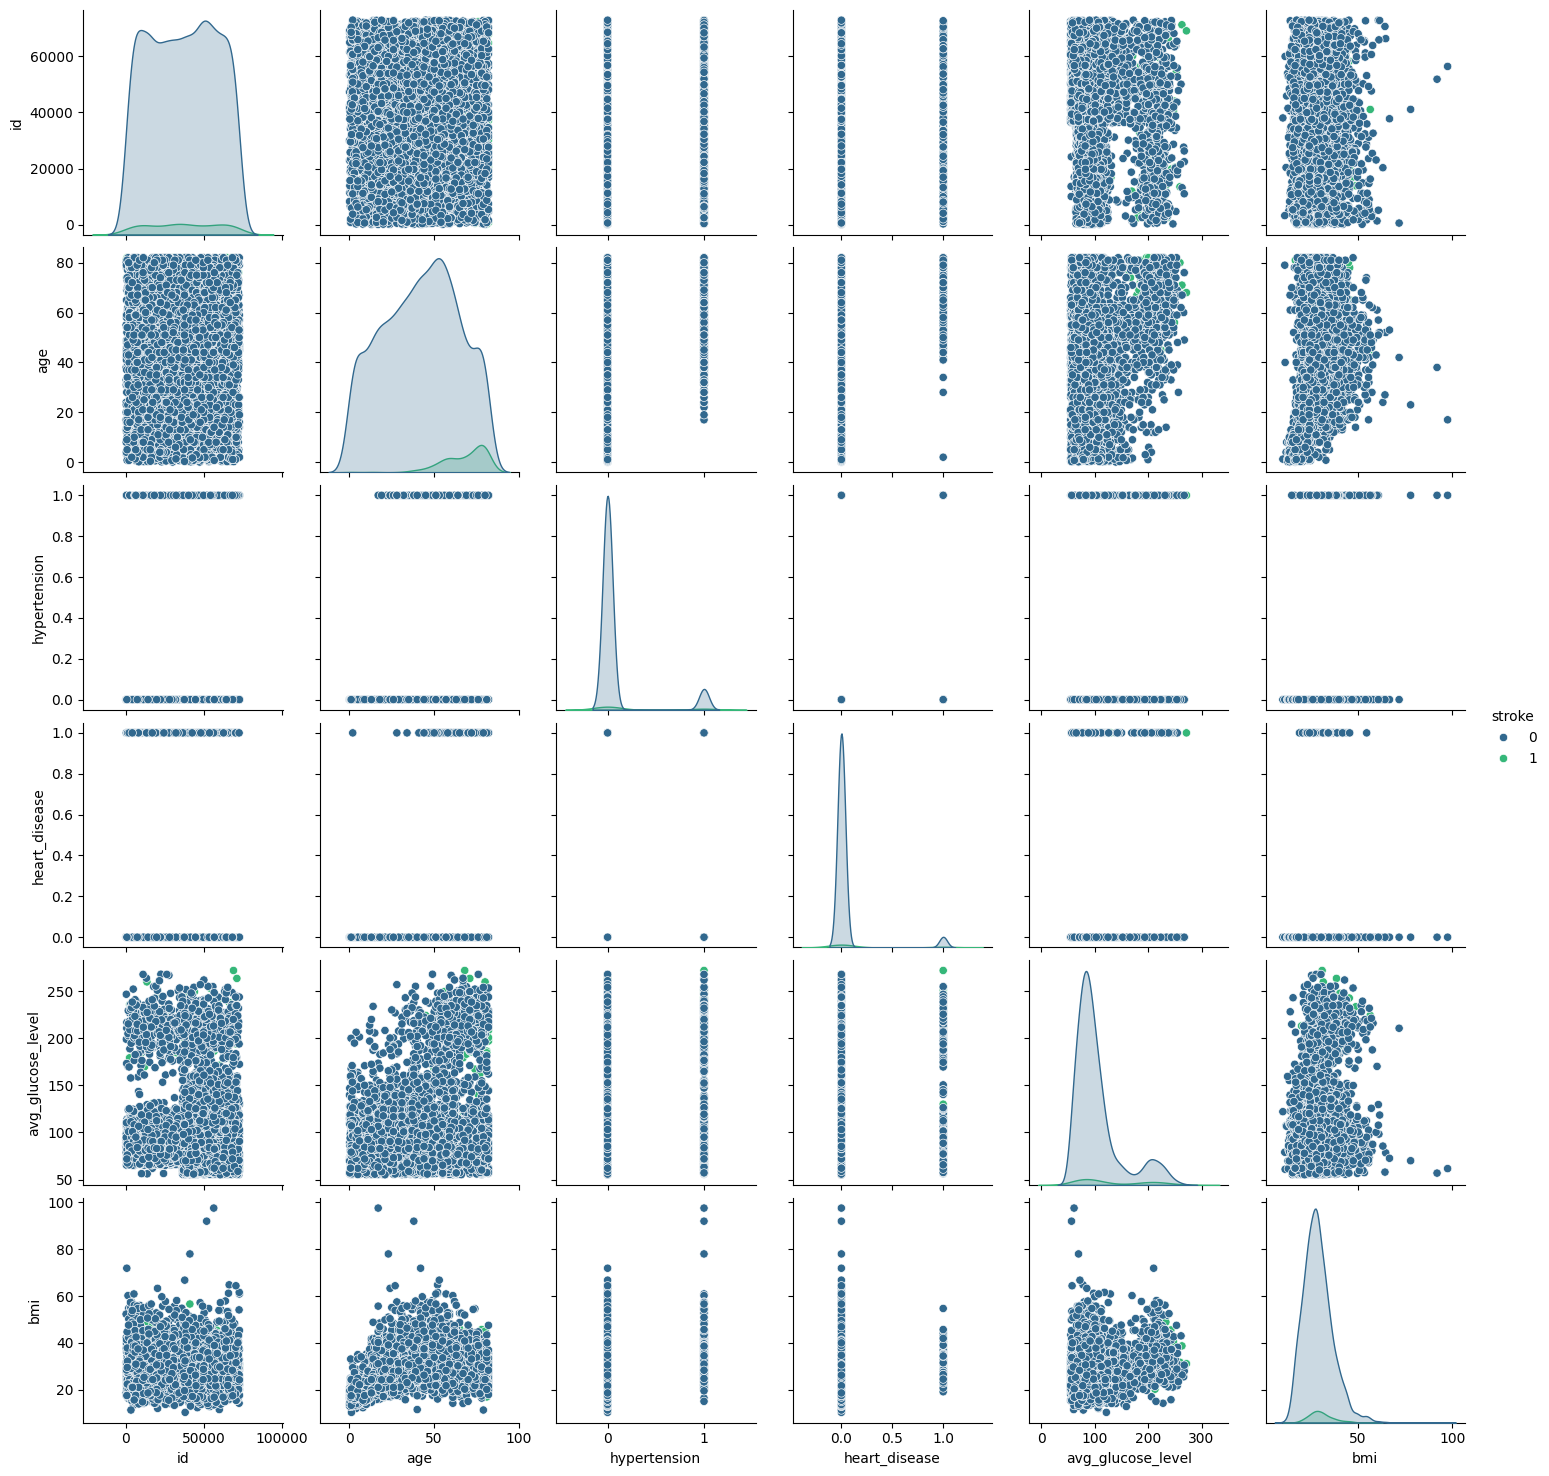

In [ ]:
# TODO: check, maybe take a random sample, maybe just remove
nicely_print('Pair Plot')
sns.pairplot(df, hue= 'stroke', palette= 'viridis')

> <br>&emsp;**`Comments:`** Does not say anything.<br>&emsp;

Correlation Heatmap 



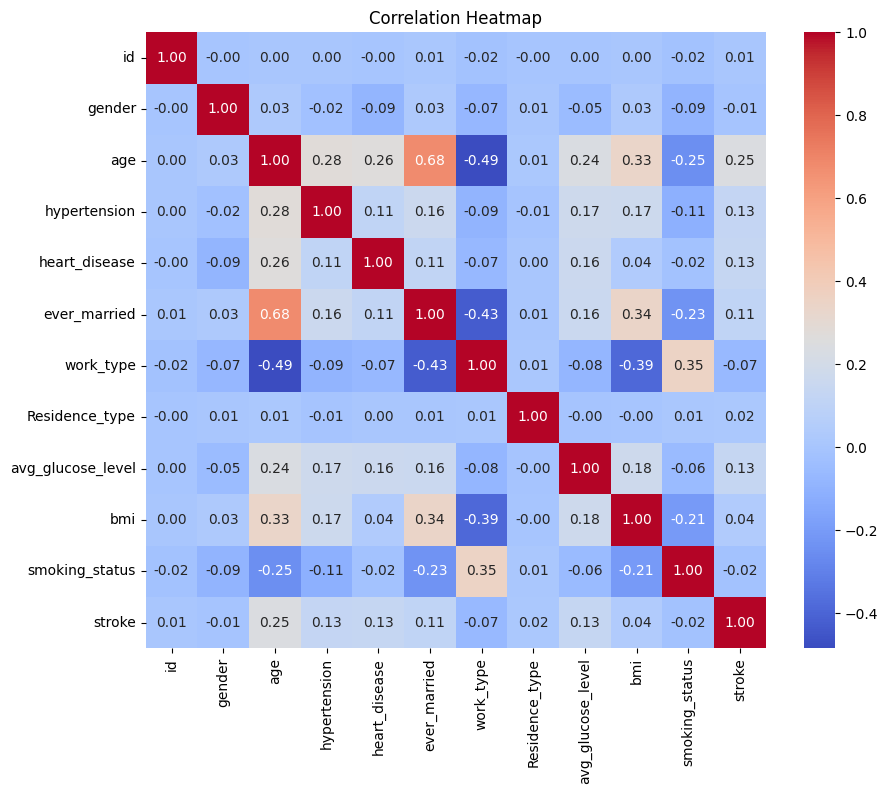

In [ ]:
nicely_print('Correlation Heatmap')

conv = { # TODO: Not good to correlate with made data
    'male': 0,
    'female': 1,
    'other': 2,
    'yes': 1,
    'no': 0,
    'private': 0,
    'self-employed': 1,
    'govt_job': 2,
    'never_worked': 3,
    'children': 4,
    'rural': 0,
    'urban': 1,
    'never smoked': 0,
    'smokes': 1,
    'formerly smoked': 2,
    'unknown': 3
}
# safe converter that returns NaN for unknowns
convert = lambda x: conv.get(str(x).lower(), np.nan)
# columns that are categorical and should be mapped
cols_to_convert = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numeric_df = df.copy()
for c in cols_to_convert:
    if c in numeric_df.columns:
        numeric_df[c] = numeric_df[c].astype(str).map(lambda v: conv.get(v.lower(), np.nan))
# keep only numeric columns for correlation (converted cols will be numeric floats)
numeric_df = numeric_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

> <br>&emsp;**`Comments:`** No column has a strong correlation with stroke. Probably because the dataset is really imbalanced.<br>&emsp;

# General Comments



# What Needs Cleaning

---

# Data Cleaning

---

# Data pre-processing

## Train-Test Split

## Pre-processing

---

# Pre-processed dataset versions

---

# Selected machine learning techniques